In [1]:
# carga pandas
import pandas as pd
# carga numpy
import numpy as np
# carga matplotlib
import matplotlib.pyplot as plt
# carga cv2
import cv2

import os

In [2]:
# lee ./uw-madison-gi-tract-image-segmentation/train.csv con pandas
df = pd.read_csv("./uw-madison-gi-tract-image-segmentation/train.csv")

# muestra las primeras 5 filas de df
df.head()

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN


In [17]:
# coloca las columnas case, day y slice en df a partir de la columna id
df['case'] = df['id'].apply(lambda x: x.split('_')[0])
df['day'] = df['id'].apply(lambda x: x.split('_')[1])
df['slice'] = df['id'].apply(lambda x: x.split('_')[3])

df.head()

,id,class,segmentation,case,day,slice
0,case123_day20_slice_0001,large_bowel,NaN,case123,day20,0001
1,case123_day20_slice_0001,small_bowel,NaN,case123,day20,0001
2,case123_day20_slice_0001,stomach,NaN,case123,day20,0001
3,case123_day20_slice_0002,large_bowel,NaN,case123,day20,0002
4,case123_day20_slice_0002,small_bowel,NaN,case123,day20,0002


In [22]:
# listo todas las clases
df['class'].unique()

array(['large_bowel', 'small_bowel', 'stomach'], dtype=object)

In [3]:
# resumen de df
df.describe()

,id,class,segmentation
count,115488,115488,33913
unique,38496,3,33899
top,case123_day20_slice_0001,large_bowel,12629 10 12894 12 13158 15 13423 17 13688 19 1...
freq,3,38496,2


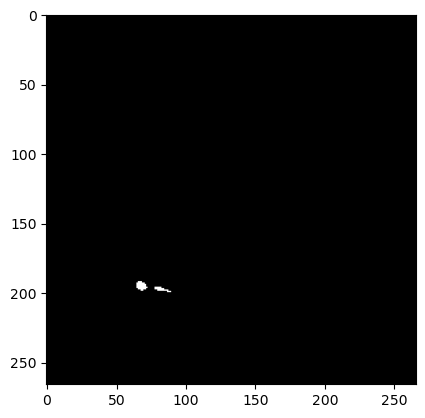

In [11]:
# lee la imagen TP-Final\uw-madison-gi-tract-image-segmentation\train\case2\case2_day1\scans\slice_0001_266_266_1.50_1.50.png en escala de grises
img = cv2.imread("./uw-madison-gi-tract-image-segmentation/train/case2/case2_day1/scans/slice_0001_266_266_1.50_1.50.png", cv2.IMREAD_GRAYSCALE)

# muestra la imagen
plt.imshow(img, cmap='gray')

In [34]:
# lee los subdirectorios de ./uw-madison-gi-tract-image-segmentation/train
subdirs = os.listdir("./uw-madison-gi-tract-image-segmentation/train")

# lee dentro de cada subdirectorio los directorios y los almacenamos en una lista
subsubdirs = []
for subdir in subdirs:
    subsubdirs.append(os.listdir("./uw-madison-gi-tract-image-segmentation/train/" + subdir))

# lee dentro de cada subdirectorio los archivos y los almacenamos en una lista
subsubfiles = []
for subdir in subdirs:
    for subsubdir in subsubdirs[subdirs.index(subdir)]:
        subsubfiles.append(os.listdir("./uw-madison-gi-tract-image-segmentation/train/" + subdir + "/" + subsubdir + "/scans/"))

# cuenta la cantidad de archivos en cada subdirectorio
subsubfiles_count = []
for subdir in subdirs:
    for subsubdir in subsubdirs[subdirs.index(subdir)]:
        subsubfiles_count.append(len(os.listdir("./uw-madison-gi-tract-image-segmentation/train/" + subdir + "/" + subsubdir + "/scans/")))

# muestra la cantidad de archivos en cada subdirectorio
print(subsubfiles_count)
print(len(subsubfiles_count))
# calcula la media de la cantidad de archivos en cada subdirectorio
print(np.mean(subsubfiles_count))

# busca los directorio donde la cantidad de archivos es menor a la media
subsubdirs_to_remove = []
for subdir in subdirs:
    for subsubdir in subsubdirs[subdirs.index(subdir)]:
        if len(os.listdir("./uw-madison-gi-tract-image-segmentation/train/" + subdir + "/" + subsubdir + "/scans/")) < np.mean(subsubfiles_count):
            subsubdirs_to_remove.append("./uw-madison-gi-tract-image-segmentation/train/" + subdir + "/" + subsubdir)

# muestra los directorio donde la cantidad de archivos es menor a la media
print(subsubdirs_to_remove)
print(len(subsubdirs_to_remove))


[144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 80, 80, 80, 80, 80, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 80, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 80, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 80, 80, 80, 144, 80, 80, 80, 80, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144

Hay 15 directorio con imagenes que tienen solo 80 capas en vez de las 140 del resto de los directorios

In [ ]:
# lee todas las imagenes del directorio ./uw-madison-gi-tract-image-segmentation/train/case2/case2_day1/scans/
# y las guarda en un array
imgsListDir = os.listdir("./uw-madison-gi-tract-image-segmentation/train/case2/case2_day1/scans/")

# muestra las primeras 5 imagenes de imgsListDir con cv2
for i in range(5):
    img = cv2.imread("./uw-madison-gi-tract-image-segmentation/train/case2/case2_day1/scans/" + imgsListDir[i], cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.show()



# Visualisamos las mascaras

In [27]:
# busca el primera mascara de df, segmentation != NaN
mascara, class_, id_ = None, None, None
for i in range(len(df)):
    if not pd.isnull(df['segmentation'][i]):
        print(df['segmentation'][i])
        print(i)
        print(df['id'][i])
        print(df['class'][i])
        mascara = df['segmentation'][i]
        id_ = df['id'][i]
        class_ = df['class'][i]
        break

28094 3 28358 7 28623 9 28889 9 29155 9 29421 9 29687 9 29953 9 30219 9 30484 10 30750 10 31016 10 31282 10 31548 10 31814 10 32081 9 32347 8 32614 6
194
case123_day20_slice_0065
stomach


['case123', 'day20', 'slice', '0065']
case123
case123_day20
slice_0065
slice_0065_266_266_1.50_1.50.png


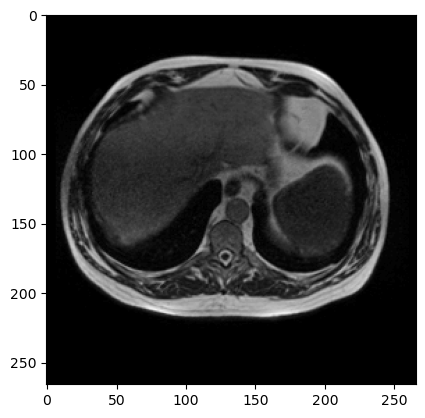

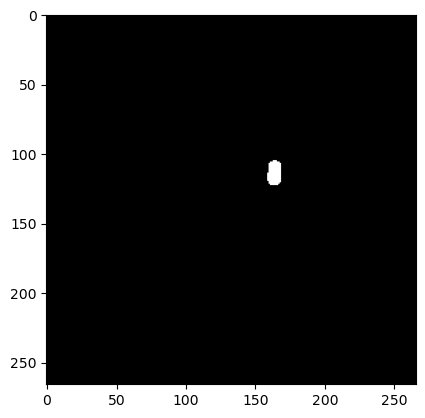

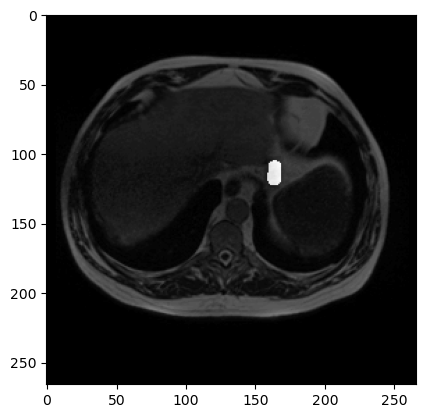

In [31]:
# de case123_day20_slice_0065 a case123, case123_day20, slice_0065
identificador = id_.split('_')
dir1 = identificador[0]
dir2 = identificador[0] + "_" + identificador[1]
dir3 = identificador[2] + "_" + identificador[3]

print(identificador)
print(dir1)
print(dir2)
print(dir3)
# en ./uw-madison-gi-tract-image-segmentation/train/" + dir1 + "/" + dir2 + "/scans/ busca el archivo que contiene dir3
imgDir = None
imgsListDir = os.listdir("./uw-madison-gi-tract-image-segmentation/train/" + dir1 + "/" + dir2 + "/scans/")
for i in range(len(imgsListDir)):
    if dir3 in imgsListDir[i]:
        print(imgsListDir[i])
        imgDir = imgsListDir[i]
        break
# busca la imagen correspondiente a la mascara encontrada, y la muestra con cv2

img = cv2.imread("./uw-madison-gi-tract-image-segmentation/train/" + dir1 + "/" + dir2 + "/scans/" + imgDir, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

# colorea la mascara
imgMask = rle2mask(mascara,255,img.shape)
plt.imshow(imgMask, cmap='gray')
plt.show()

# coloca la mascara sobre la imagen
imgMasked = cv2.addWeighted(img, 0.75, imgMask, 0.25, 0)
plt.imshow(imgMasked, cmap='gray')
plt.show()

# Se genera una forma 3d a partir de todas las capas

In [3]:
# %pip install vtk==9.2.6
# %pip install mayavi

Note: you may need to restart the kernel to use updated packages.


"DOSKEY" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [4]:
from mayavi import mlab

In [34]:
# lee todas las imagenes del directorio ./uw-madison-gi-tract-image-segmentation/train/case2/case2_day1/scans/
# y las guarda en un array
imgsListDir = os.listdir("./uw-madison-gi-tract-image-segmentation/train/case2/case2_day1/scans/")
print(imgsListDir)
# lee las imagenes con cv2 y las guarda en un array
images = [cv2.imread("./uw-madison-gi-tract-image-segmentation/train/case2/case2_day1/scans/"+path, cv2.IMREAD_GRAYSCALE) for path in imgsListDir]  # Lee las imágenes en escala de grises

# Construcción del volumen 3D: Crea un volumen 3D apilando las imágenes registradas.
volume = np.stack(images, axis=-1)

# Visualización del modelo 3D: Utiliza una biblioteca como Mayavi para visualizar el modelo 3D.
mlab.figure(bgcolor=(0, 0, 0))  # Crea una nueva figura

# Muestra el volumen 3D utilizando un objeto de volumen
mlab.pipeline.volume(mlab.pipeline.scalar_field(volume))

mlab.show()  # Muestra la figura

['slice_0001_266_266_1.50_1.50.png', 'slice_0002_266_266_1.50_1.50.png', 'slice_0003_266_266_1.50_1.50.png', 'slice_0004_266_266_1.50_1.50.png', 'slice_0005_266_266_1.50_1.50.png', 'slice_0006_266_266_1.50_1.50.png', 'slice_0007_266_266_1.50_1.50.png', 'slice_0008_266_266_1.50_1.50.png', 'slice_0009_266_266_1.50_1.50.png', 'slice_0010_266_266_1.50_1.50.png', 'slice_0011_266_266_1.50_1.50.png', 'slice_0012_266_266_1.50_1.50.png', 'slice_0013_266_266_1.50_1.50.png', 'slice_0014_266_266_1.50_1.50.png', 'slice_0015_266_266_1.50_1.50.png', 'slice_0016_266_266_1.50_1.50.png', 'slice_0017_266_266_1.50_1.50.png', 'slice_0018_266_266_1.50_1.50.png', 'slice_0019_266_266_1.50_1.50.png', 'slice_0020_266_266_1.50_1.50.png', 'slice_0021_266_266_1.50_1.50.png', 'slice_0022_266_266_1.50_1.50.png', 'slice_0023_266_266_1.50_1.50.png', 'slice_0024_266_266_1.50_1.50.png', 'slice_0025_266_266_1.50_1.50.png', 'slice_0026_266_266_1.50_1.50.png', 'slice_0027_266_266_1.50_1.50.png', 'slice_0028_266_266_1.50_1.

In [18]:
# busco el caso 2 y dia 1 en el dataframe
df_case2_day1 = df.loc[(df['case'] =='case2' ) & (df['day'] == 'day1')]
# quito los NaN
df_case2_day1 = df_case2_day1.dropna()
print(df_case2_day1)

                           id        class   
110453  case2_day1_slice_0050      stomach  \
110456  case2_day1_slice_0051      stomach   
110459  case2_day1_slice_0052      stomach   
110462  case2_day1_slice_0053      stomach   
110465  case2_day1_slice_0054      stomach   
...                       ...          ...   
110668  case2_day1_slice_0122  small_bowel   
110670  case2_day1_slice_0123  large_bowel   
110671  case2_day1_slice_0123  small_bowel   
110673  case2_day1_slice_0124  large_bowel   
110674  case2_day1_slice_0124  small_bowel   

                                             segmentation   case   day slice  
110453  30207 7 30471 13 30733 19 30996 22 31261 24 31...  case2  day1  0050  
110456  29942 9 30204 15 30466 20 30730 23 30995 24 31...  case2  day1  0051  
110459  29412 6 29675 11 29938 17 30201 20 30465 23 30...  case2  day1  0052  
110462  28614 13 28878 17 29142 19 29407 21 29671 24 2...  case2  day1  0053  
110465  25429 7 25694 10 25960 11 26226 12 26492 13 

In [46]:
# lee todas las imagenes del directorio ./uw-madison-gi-tract-image-segmentation/train/case2/case2_day1/scans/
# y las guarda en un array
imgsListDir = os.listdir("./uw-madison-gi-tract-image-segmentation/train/case2/case2_day1/scans/")
print(imgsListDir)

images = []
imagesMasked = []
masks = []
# recorro las imagenes y busco las mascaras correspondientes en el dataframe si tiene
for i in range(len(imgsListDir)):
    # lee la imagen
    img = cv2.imread("./uw-madison-gi-tract-image-segmentation/train/case2/case2_day1/scans/"+imgsListDir[i], cv2.IMREAD_GRAYSCALE)
    imgMasked = img
    mask = np.zeros(img.shape)
    # busco el slice correspondiente en el dataframe
    df_slice = df_case2_day1.loc[df_case2_day1['slice'] == imgsListDir[i].split('_')[1]]
    # print(df_slice)
    # si tiene mascara
    if len(df_slice) > 0:
        # recorro las mascaras
        for j in range(len(df_slice)):
            # obtengo la mascara
            mascara = df_slice['segmentation'].iloc[j]
            # colorea la mascara
            imgMask = rle2mask(mascara, 125, img.shape)
            mask = imgMask + mask
            # coloca la mascara sobre la imagen
            imgMasked = cv2.addWeighted(imgMasked, 0.95, imgMask, 0.05, 0)

    # agrega la imagen al array de imagenes
    images.append(img)
    # agrega la imagen con mascara al array de imagenes con mascara
    imagesMasked.append(imgMasked)
    # agrega la mascara al array de mascaras
    masks.append(mask)

    
# Construcción del volumen 3D: Crea un volumen 3D apilando las imágenes registradas.
volume = np.stack(images, axis=-1)
volumeMask = np.stack(masks, axis=-1)



# Visualización del modelo 3D: Utiliza una biblioteca como Mayavi para visualizar el modelo 3D.
# mlab.figure(bgcolor=(0, 0, 0))  # Crea una nueva figura

# Muestra el volumen 3D utilizando un objeto de volumen
# mlab.pipeline.volume(mlab.pipeline.scalar_field(volume))

# agrega otra figura con la mascara en 3D con un color diferente
mlab.figure(bgcolor=(0, 0, 0))  # Crea una nueva figura
# Muestra el volumen 3D utilizando un objeto de volumen
mlab.pipeline.volume(mlab.pipeline.scalar_field(volume), color=(1, 0, 0))
# Muestra el volumen 3D utilizando un objeto de volumen
mlab.pipeline.volume(mlab.pipeline.scalar_field(volumeMask), color=(0, 1, 0))



mlab.show()  # Muestra la figura


['slice_0001_266_266_1.50_1.50.png', 'slice_0002_266_266_1.50_1.50.png', 'slice_0003_266_266_1.50_1.50.png', 'slice_0004_266_266_1.50_1.50.png', 'slice_0005_266_266_1.50_1.50.png', 'slice_0006_266_266_1.50_1.50.png', 'slice_0007_266_266_1.50_1.50.png', 'slice_0008_266_266_1.50_1.50.png', 'slice_0009_266_266_1.50_1.50.png', 'slice_0010_266_266_1.50_1.50.png', 'slice_0011_266_266_1.50_1.50.png', 'slice_0012_266_266_1.50_1.50.png', 'slice_0013_266_266_1.50_1.50.png', 'slice_0014_266_266_1.50_1.50.png', 'slice_0015_266_266_1.50_1.50.png', 'slice_0016_266_266_1.50_1.50.png', 'slice_0017_266_266_1.50_1.50.png', 'slice_0018_266_266_1.50_1.50.png', 'slice_0019_266_266_1.50_1.50.png', 'slice_0020_266_266_1.50_1.50.png', 'slice_0021_266_266_1.50_1.50.png', 'slice_0022_266_266_1.50_1.50.png', 'slice_0023_266_266_1.50_1.50.png', 'slice_0024_266_266_1.50_1.50.png', 'slice_0025_266_266_1.50_1.50.png', 'slice_0026_266_266_1.50_1.50.png', 'slice_0027_266_266_1.50_1.50.png', 'slice_0028_266_266_1.50_1.